# ETAPA #0 Tentativas de obter dados via API

In [60]:
import math # Mathematical functions 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from keras.models import Sequential # Deep learning library, used for neural networks
from keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns


In [61]:
import yfinance as yf

msft = yf.Ticker("MSFT")    # get data for Microsoft

# get stock info
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, organizations, and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutio

In [45]:
goau = yf.Ticker("GOAU4")    # get data for Gerdau at B3   --- não funciona para ações na bolsa brasileira!!!!  :(  
goau.info

{'regularMarketPrice': None, 'logo_url': ''}

In [26]:
# get historical market data for MICROSOFT
hist = msft.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056108,0.064359,0.056108,0.061608,1031788800,0.0,0.0
1986-03-14,0.061608,0.064909,0.061608,0.063809,308160000,0.0,0.0
1986-03-17,0.063809,0.065459,0.063809,0.064909,133171200,0.0,0.0
1986-03-18,0.064909,0.065459,0.062708,0.063258,67766400,0.0,0.0
1986-03-19,0.063258,0.063809,0.061608,0.062158,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2021-08-02,286.359985,286.769989,283.739990,284.820007,16267400,0.0,0.0
2021-08-03,285.420013,287.230011,284.000000,287.119995,17863200,0.0,0.0
2021-08-04,286.220001,287.589996,284.649994,286.510010,16191300,0.0,0.0


In [27]:
# show actions (dividends, splits)
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2020-05-20,0.51,0.0
2020-08-19,0.51,0.0
2020-11-18,0.56,0.0


In [28]:
# show dividends
msft.dividends

Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2020-05-20    0.51
2020-08-19    0.51
2020-11-18    0.56
2021-02-17    0.56
2021-05-19    0.56
Name: Dividends, Length: 70, dtype: float64

In [29]:
# show splits
msft.splits

Date
1987-09-21    2.0
1990-04-16    2.0
1991-06-27    1.5
1992-06-15    1.5
1994-05-23    2.0
1996-12-09    2.0
1998-02-23    2.0
1999-03-29    2.0
2003-02-18    2.0
Name: Stock Splits, dtype: float64

In [30]:
# show financials
msft.financials
msft.quarterly_financials

,2021-06-30,2021-03-31,2020-12-31,2020-09-30
Research Development,5.687e+09,5.204e+09,4.899e+09,4.926e+09
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,1.9405e+10,1.7236e+10,1.8337e+10,1.6124e+10
Minority Interest,None,None,None,None
Net Income,1.6458e+10,1.5457e+10,1.5463e+10,1.3893e+10
Selling General Administrative,7.379e+09,6.409e+09,6.086e+09,5.35e+09
Gross Profit,3.2161e+10,2.8661e+10,2.8882e+10,2.6152e+10
Ebit,1.9095e+10,1.7048e+10,1.7897e+10,1.5876e+10
Operating Income,1.9095e+10,1.7048e+10,1.7897e+10,1.5876e+10
Other Operating Expenses,None,None,None,None


In [31]:
# show major holders
msft.major_holders

,0,1
0,0.08%,% of Shares Held by All Insider
1,72.22%,% of Shares Held by Institutions
2,72.28%,% of Float Held by Institutions
3,5314,Number of Institutions Holding Shares


In [32]:
# show institutional holders
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",610849992,2021-03-30,0.0813,144020102613
1,Blackrock Inc.,518649291,2021-03-30,0.0690,122281943339
2,State Street Corporation,292575655,2021-03-30,0.0389,68980562179
3,"FMR, LLC",217585928,2021-03-30,0.0290,51300234244
4,Price (T.Rowe) Associates Inc,178824616,2021-03-30,0.0238,42161479714
5,"Geode Capital Management, LLC",120231394,2021-03-30,0.0160,28346955763
6,Capital World Investors,112150578,2021-03-30,0.0149,26441741775
7,Capital Research Global Investors,99286940,2021-03-30,0.0132,23408881843
8,Capital International Investors,90228967,2021-03-30,0.0120,21273283549
9,Northern Trust Corporation,89762724,2021-03-30,0.0119,21163357437


In [33]:
# show balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

,2021-06-30,2021-03-31,2020-12-31,2020-09-30
Intangible Assets,7.800000e+09,8.127000e+09,6.555000e+09,6.923000e+09
Total Liab,1.917910e+11,1.743740e+11,1.739010e+11,1.776090e+11
Total Stockholder Equity,1.419880e+11,1.345050e+11,1.302360e+11,1.233920e+11
Other Current Liab,5.261200e+10,4.006900e+10,3.992600e+10,4.299600e+10
Total Assets,3.337790e+11,3.088790e+11,3.041370e+11,3.010010e+11
Common Stock,8.311100e+10,8.230800e+10,8.189600e+10,8.108900e+10
Other Current Assets,1.347100e+10,1.203400e+10,1.274800e+10,1.357200e+10
Retained Earnings,5.705500e+10,5.073500e+10,4.497300e+10,3.919300e+10
Other Liab,3.168100e+10,3.160100e+10,3.158500e+10,3.317400e+10
Good Will,4.971100e+10,4.969800e+10,4.421900e+10,4.389000e+10


In [34]:
# show cashflow
msft.cashflow
msft.quarterly_cashflow

,2021-06-30,2021-03-31,2020-12-31,2020-09-30
Investments,-4.334000e+09,2.517000e+09,2.593000e+09,2.100000e+09
Change To Liabilities,1.301400e+10,3.600000e+08,-3.194000e+09,-2.749000e+09
Total Cashflows From Investing Activities,-1.085300e+10,-9.684000e+09,-1.669000e+09,-5.371000e+09
Total Cash From Financing Activities,-1.137100e+10,-1.319200e+10,-1.363400e+10,-1.028900e+10
Change To Operating Activities,7.990000e+08,1.305000e+09,1.879000e+09,-2.823000e+09
Issuance Of Stock,4.500000e+08,3.960000e+08,3.020000e+08,5.450000e+08
Net Income,1.645800e+10,1.545700e+10,1.546300e+10,1.389300e+10
Change In Cash,5.220000e+08,-7.300000e+08,-2.773000e+09,3.629000e+09
Repurchase Of Stock,-7.177000e+09,-6.930000e+09,-6.535000e+09,-6.743000e+09
Effect Of Exchange Rate,3.600000e+07,-3.300000e+07,1.400000e+07,-4.600000e+07


In [35]:
# show earnings
msft.earnings
msft.quarterly_earnings

,Revenue,Earnings
Quarter,,
3Q2020,37154000000,13893000000
4Q2020,43076000000,15463000000
1Q2021,41706000000,15457000000
2Q2021,46152000000,16458000000


In [36]:
# show sustainability
msft.sustainability

,Value
2021-5,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.37
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [37]:
# show analysts recommendations
msft.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2021-07-28 14:47:46,Barclays,Overweight,,main
2021-07-28 14:49:16,Citigroup,Buy,,main
2021-07-28 14:51:12,Mizuho,Buy,,main


In [38]:
# show next event (earnings, etc)
msft.calendar

,0,1
Earnings Date,2021-10-25 10:59:00,2021-10-29 12:00:00
Earnings Average,1.9,1.9
Earnings Low,1.64,1.64
Earnings High,2.03,2.03
Revenue Average,44102900000,44102900000
Revenue Low,40850000000,40850000000
Revenue High,44914700000,44914700000


In [39]:
# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

'US5949181045'

In [40]:
# show options expirations
msft.options

('2021-08-13',
 '2021-08-20',
 '2021-08-27',
 '2021-09-03',
 '2021-09-10',
 '2021-09-17',
 '2021-09-24',
 '2021-10-15',
 '2021-11-19',
 '2021-12-17',
 '2022-01-21',
 '2022-03-18',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16')

In [43]:
# get option chain for specific expiration
opt = msft.option_chain('2021-11-19')    # data available via: opt.calls, opt.puts
opt

Options(calls=         contractSymbol       lastTradeDate  strike  lastPrice     bid  \
0   MSFT211119C00120000 2021-06-14 04:09:17   120.0     137.25    0.00   
1   MSFT211119C00125000 2021-06-14 04:09:17   125.0     132.75    0.00   
2   MSFT211119C00130000 2021-05-18 16:30:20   130.0     115.81  129.20   
3   MSFT211119C00140000 2021-05-20 13:42:47   140.0     107.15  118.30   
4   MSFT211119C00145000 2021-05-18 16:27:35   145.0     101.18  114.05   
5   MSFT211119C00150000 2021-07-23 13:30:14   150.0     138.24  139.15   
6   MSFT211119C00155000 2021-05-18 17:23:55   155.0      91.70  104.55   
7   MSFT211119C00160000 2021-08-05 14:12:40   160.0     127.85  127.70   
8   MSFT211119C00165000 2021-08-05 19:20:05   165.0     123.85  124.25   
9   MSFT211119C00170000 2021-08-04 18:30:25   170.0     117.35  119.25   
10  MSFT211119C00175000 2021-08-04 19:59:34   175.0     111.75  114.30   
11  MSFT211119C00180000 2021-08-06 14:55:24   180.0     107.95  109.35   
12  MSFT211119C00185000 

In [49]:
# Setting the timeframe for the data extraction
today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = '2010-01-01'

# Getting NASDAQ quotes
stockname = 'NASDAQ'
symbol = '^IXIC'

#stockname = '^BVSP'
symbol = '^GOAU4'
#symbol = '^BVSP'

# You can either use webreader or yfinance to load the data from yahoo finance
#import pandas_datareader as webreader
#df = webreader.DataReader(symbol, start=date_start, end=date_today, data_source="yahoo")


#import yfinance as yf #Alternative package if webreader does not work: 
df = yf.download(symbol, start=date_start, end=date_today)

# Create a quick overview of the dataset
print(symbol)
df


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^GOAU4: No data found, symbol may be delisted
^GOAU4


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


# ETAPA #1 Lendo arquivo com dados de GOAU4

In [62]:
df = pd.read_csv('Dados\\GOAU4.SA.csv',header=0,index_col=0)
df.dropna(subset=['Close'], inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,23.580000,23.580000,22.639999,22.950001,20.238739,849700.0
2014-01-03,22.709999,23.020000,22.360001,22.730000,20.044725,570000.0
2014-01-06,22.459999,22.780001,22.280001,22.690001,20.009457,762300.0
2014-01-07,22.750000,22.990000,22.410000,22.549999,19.885990,1065200.0
2014-01-08,22.500000,23.010000,22.350000,22.500000,19.841902,747300.0
...,...,...,...,...,...,...
2021-06-21,13.450000,13.970000,13.290000,13.900000,13.900000,13568600.0
2021-06-22,13.830000,13.900000,13.650000,13.860000,13.860000,12932900.0
2021-06-23,13.830000,13.940000,13.740000,13.780000,13.780000,9456300.0


# ETAPA #2 Incluindo dados de Covid

In [63]:
################### Obtendo os dados diários de casos de Covid: #####################################################

dataset_Covid_2020_01a07 = pd.read_csv('Dados\\HIST_PAINEL_COVIDBR_2020_Parte1_18jul2021.csv', header=0, index_col=0, delimiter=r";")
dataset_Covid_2020_08a12 = pd.read_csv('Dados\\HIST_PAINEL_COVIDBR_2020_Parte2_18jul2021.csv',header=0,index_col=0, delimiter=r";")
dataset_Covid_2021_01a06 = pd.read_csv('Dados\\HIST_PAINEL_COVIDBR_2021_Parte1_18jul2021.csv', header=0, index_col=0, delimiter=r";")


In [64]:

################### Filtrando somente as linhas e colunas relevantes:

# df.loc[df['column_name'] == some_value]
# Somente linhas referentes ao país, não aos estados e municípios
dataset_Covid_2020_01a07 = dataset_Covid_2020_01a07.loc['Brasil']
dataset_Covid_2020_08a12 = dataset_Covid_2020_08a12.loc['Brasil']
dataset_Covid_2021_01a06 = dataset_Covid_2021_01a06.loc['Brasil']

dataset_Covid_2020_01a07 = dataset_Covid_2020_01a07[['data','casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos']]
dataset_Covid_2020_08a12 = dataset_Covid_2020_08a12[['data','casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos']]
dataset_Covid_2021_01a06 = dataset_Covid_2021_01a06[['data','casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos']]

#### Reunindo os dados de Covid num único dataset
dataset_Covid = dataset_Covid_2020_01a07.append(dataset_Covid_2020_08a12)
dataset_Covid = dataset_Covid.append(dataset_Covid_2021_01a06)
print (min(dataset_Covid['data']), max(dataset_Covid['data']))

dataset_Covid= dataset_Covid.rename(columns = {'data': 'Date'}, inplace = False)

dataset_Covid.set_index('Date', inplace = True)
dataset_Covid[:5]

2020-02-25 2021-06-30


,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
Date,,,,
2020-02-25,0.0,0,0,0
2020-02-26,1.0,1,0,0
2020-02-27,1.0,0,0,0
2020-02-28,1.0,0,0,0
2020-02-29,2.0,1,0,0


In [65]:
################## Procurando missing datas...
if dataset_Covid.isnull().sum().any() > 0:
    print ("DADOS DE COVID CONTÊM NULOS! ")    
else:
    print ("Dados de Covid não contêm nulos (God bless it!)")

Dados de Covid não contêm nulos (God bless it!)


In [66]:
dataset_Covid

,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
Date,,,,
2020-02-25,0.0,0,0,0
2020-02-26,1.0,1,0,0
2020-02-27,1.0,0,0,0
2020-02-28,1.0,0,0,0
2020-02-29,2.0,1,0,0
...,...,...,...,...
2021-06-26,18386894.0,64134,512735,1593
2021-06-27,18420598.0,33704,513474,739
2021-06-28,18448402.0,27804,514092,618


In [67]:
dataset_Covid.index

Index(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       ...
       '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25',
       '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29', '2021-06-30'],
      dtype='object', name='Date', length=493)

In [68]:
dataset_Covid.describe()

,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
count,4.930000e+02,493.000000,493.000000,493.000000
mean,6.536627e+06,37641.259635,179534.797160,1050.843813
std,5.566579e+06,25930.133074,146674.080502,855.198754
min,0.000000e+00,0.000000,0.000000,0.000000
25%,1.313667e+06,17246.000000,57070.000000,480.000000
50%,5.468270e+06,33704.000000,158456.000000,869.000000
75%,1.051723e+07,55649.000000,254221.000000,1284.000000
max,1.855714e+07,115228.000000,518066.000000,4249.000000


In [69]:
################### Adicionando colunas 'numCasosCov' e 'numObitosCov' ao dataset de treinamento
df['numCasosCov'] = int(0)
df['numObitosCov'] = int(0)

for dt in dataset_Covid.index:
    if dt in df.index:        # there are no stock prices for weekends
        df.loc[dt, 'numCasosCov'] = int(dataset_Covid.loc[dt,'casosNovos'])
        df.loc[dt, 'numObitosCov'] = int(dataset_Covid.loc[dt,'obitosNovos'])
        if dt > '2021-01-11':
            print(dt, 'dt_covid:', dataset_Covid.loc[dt,'obitosNovos'], 'stock_ds:', df.loc[dt, 'numObitosCov'])
        
df

2021-01-12 dt_covid: 1110.0 stock_ds: 1110
2021-01-13 dt_covid: 1274.0 stock_ds: 1274
2021-01-14 dt_covid: 1131.0 stock_ds: 1131
2021-01-15 dt_covid: 1151.0 stock_ds: 1151
2021-01-18 dt_covid: 452.0 stock_ds: 452
2021-01-19 dt_covid: 1192.0 stock_ds: 1192
2021-01-20 dt_covid: 1340.0 stock_ds: 1340
2021-01-21 dt_covid: 1316.0 stock_ds: 1316
2021-01-22 dt_covid: 1096.0 stock_ds: 1096
2021-01-26 dt_covid: 1214.0 stock_ds: 1214
2021-01-27 dt_covid: 1283.0 stock_ds: 1283
2021-01-28 dt_covid: 1386.0 stock_ds: 1386
2021-01-29 dt_covid: 1119.0 stock_ds: 1119
2021-02-01 dt_covid: 595.0 stock_ds: 595
2021-02-02 dt_covid: 1210.0 stock_ds: 1210
2021-02-03 dt_covid: 1254.0 stock_ds: 1254
2021-02-04 dt_covid: 1232.0 stock_ds: 1232
2021-02-05 dt_covid: 1239.0 stock_ds: 1239
2021-02-08 dt_covid: 636.0 stock_ds: 636
2021-02-09 dt_covid: 1350.0 stock_ds: 1350
2021-02-10 dt_covid: 1330.0 stock_ds: 1330
2021-02-11 dt_covid: 1351.0 stock_ds: 1351
2021-02-12 dt_covid: 1288.0 stock_ds: 1288
2021-02-18 dt_cov

,Open,High,Low,Close,Adj Close,Volume,numCasosCov,numObitosCov
Date,,,,,,,,
2014-01-02,23.580000,23.580000,22.639999,22.950001,20.238739,849700.0,0,0
2014-01-03,22.709999,23.020000,22.360001,22.730000,20.044725,570000.0,0,0
2014-01-06,22.459999,22.780001,22.280001,22.690001,20.009457,762300.0,0,0
2014-01-07,22.750000,22.990000,22.410000,22.549999,19.885990,1065200.0,0,0
2014-01-08,22.500000,23.010000,22.350000,22.500000,19.841902,747300.0,0,0
...,...,...,...,...,...,...,...,...
2021-06-21,13.450000,13.970000,13.290000,13.900000,13.900000,13568600.0,38903,761
2021-06-22,13.830000,13.900000,13.650000,13.860000,13.860000,12932900.0,87822,2131
2021-06-23,13.830000,13.940000,13.740000,13.780000,13.780000,9456300.0,115228,2392


In [70]:
################################################################################################
#   Acrescentando uma coluna com a amplitude de preços diária (máxima - mínima):
################################################################################################
df['Dif'] = df['High'] - df['Low']

# ETAPA #3 Explorando os dados

In [71]:
# Período total dos dados coletados (a serem divididos entre dados de treinamento e de teste)
start_date = '2014-01-01'
end_date =   '2021-06-25'

train_start_date = '2014-01-01'
train_end_date =   '2020-12-31'

test_start_date = '2021-01-01'
test_end_date =   '2021-06-25'

# Definindo os dados de treinamento e teste:
train_goau4 = df.loc[train_start_date: train_end_date, ]
test_goau4 = df.loc[test_start_date: test_end_date, ]

train_goau4

,Open,High,Low,Close,Adj Close,Volume,numCasosCov,numObitosCov,Dif
Date,,,,,,,,,
2014-01-02,23.580000,23.580000,22.639999,22.950001,20.238739,849700.0,0,0,0.940001
2014-01-03,22.709999,23.020000,22.360001,22.730000,20.044725,570000.0,0,0,0.659999
2014-01-06,22.459999,22.780001,22.280001,22.690001,20.009457,762300.0,0,0,0.500000
2014-01-07,22.750000,22.990000,22.410000,22.549999,19.885990,1065200.0,0,0,0.580000
2014-01-08,22.500000,23.010000,22.350000,22.500000,19.841902,747300.0,0,0,0.660000
...,...,...,...,...,...,...,...,...,...
2020-12-22,11.190000,11.270000,10.800000,10.900000,10.681919,9311300.0,55202,968,0.470000
2020-12-23,10.870000,11.080000,10.830000,11.070000,10.848518,6821000.0,46696,961,0.250000
2020-12-28,11.150000,11.190000,11.020000,11.090000,10.868117,5249900.0,20548,431,0.170000


In [72]:
#pip install yfinance

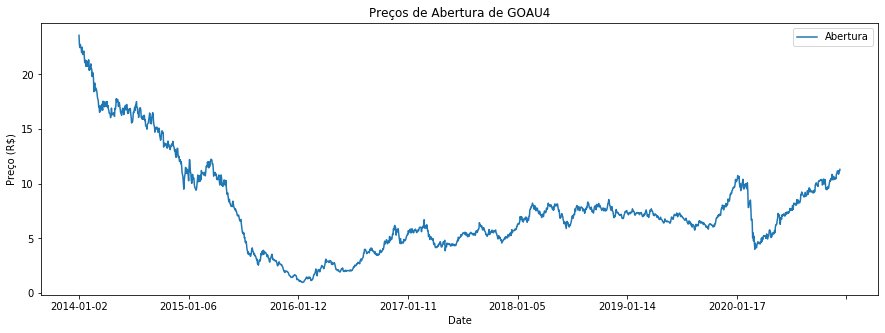

In [73]:
#Plotagem da série histórica
plt.figure(figsize=(15,5))
train_goau4['Open'].plot(label = 'Abertura')
plt.ylabel('Preço (R$)')
#plt.xlabel('Período')
plt.title('Preços de Abertura de GOAU4')
plt.legend();

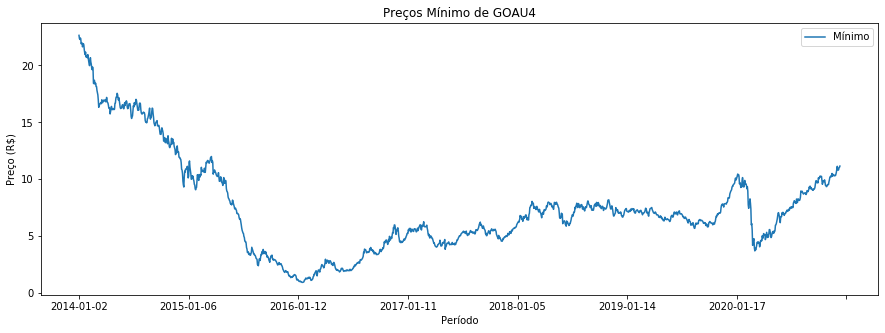

In [74]:
#Plotagem da série histórica
plt.figure(figsize=(15,5))
train_goau4['Low'].plot(label = 'Mínimo')
plt.ylabel('Preço (R$)')
plt.xlabel('Período')
plt.title('Preços Mínimo de GOAU4')
plt.legend();

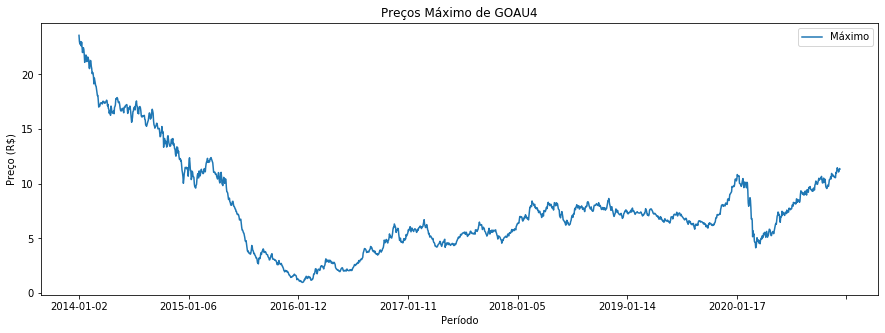

In [75]:
#Plotagem da série histórica
plt.figure(figsize=(15,5))
train_goau4['High'].plot(label = 'Máximo')
plt.ylabel('Preço (R$)')
plt.xlabel('Período')
plt.title('Preços Máximo de GOAU4')
plt.legend();

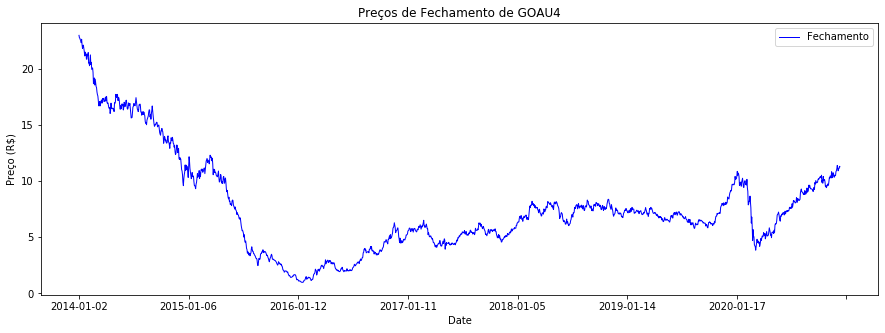

In [76]:
#Plotagem da série histórica
plt.figure(figsize=(15,5))
train_goau4['Close'].plot(label = 'Fechamento', color = 'blue', linewidth=1)
plt.ylabel('Preço (R$)')
#plt.xlabel('Período')
plt.title('Preços de Fechamento de GOAU4')
plt.legend();

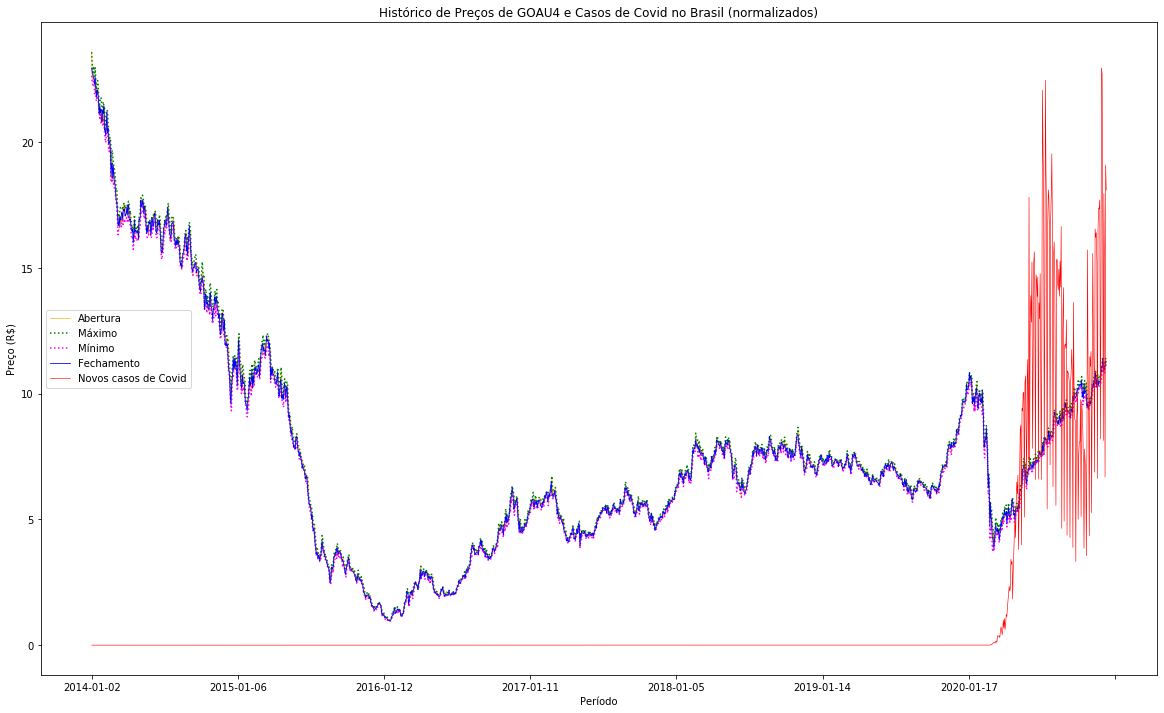

In [77]:
maxGoau = max(train_goau4['Close'])
maxCov = max(train_goau4['numCasosCov'])

#Plotagem da série histórica
plt.figure(figsize=(20,12))
train_goau4['Open'].plot(label = 'Abertura', color = 'orange', linewidth = 0.6)
train_goau4['High'].plot(label = 'Máximo', color = 'green', linestyle=":")
train_goau4['Low'].plot(label = 'Mínimo', color = 'magenta', linestyle=":")
train_goau4['Close'].plot(label = 'Fechamento', color = 'blue', linewidth=0.8)
# (train_dataset_adj/train_dataset_adj.iloc[0]*100).plot(figsize=(18,8), color=[color_dict.get(x, '#3333') for x in train_dataset_adj.columns])
(train_goau4['numCasosCov'] * maxGoau / maxCov).plot(label = 'Novos casos de Covid', color = 'red', linewidth=0.6)
plt.ylabel('Preço (R$)')
plt.xlabel('Período')
plt.title('Histórico de Preços de GOAU4 e Casos de Covid no Brasil (normalizados)')
plt.legend();

# ETAPA #4 Preprocessamento e Seleção de Características

In [78]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,numCasosCov,numObitosCov,Dif
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1.854000e+03,1854.000000,1854.000000,1854.000000
mean,7.995992,8.138172,7.833301,7.981111,7.399377,1.201696e+07,7191.462244,205.091154,0.304871
std,4.444072,4.497761,4.378671,4.439664,4.039251,9.119752e+06,19191.130997,581.393462,0.186827
min,0.960000,0.980000,0.940000,0.970000,0.885868,0.000000e+00,0.000000,0.000000,0.000000
25%,5.102500,5.210000,4.950000,5.100000,4.697325,5.750850e+06,0.000000,0.000000,0.170000
50%,7.120000,7.210000,7.000000,7.100000,6.707814,1.102960e+07,0.000000,0.000000,0.260000
75%,10.295000,10.477500,10.110000,10.277500,9.570668,1.622482e+07,0.000000,0.000000,0.390000
max,23.580000,23.580000,22.639999,22.950001,20.238739,6.728560e+07,115228.000000,4249.000000,1.370001


In [79]:
# Indexing Batches
train_df = df.sort_values(by=['Date']).copy()

train_df=train_df.drop(['Adj Close','Open','Low','High','Volume'], axis=1)

# We save a copy of the dates index, before we need to reset it to numbers
date_index = train_df.index

# Incluindo uma coluna adicional, com a amplitude diária de preços (max - min)
#train_df['Dif'] = train_df['High'] - train_df['Low']
# d = pd.to_datetime(train_df.index)

# We reset the index, so we can convert the date-index to a number-index
train_df = train_df.reset_index(drop=True).copy()
train_df

,Close,numCasosCov,numObitosCov,Dif
0,22.950001,0,0,0.940001
1,22.730000,0,0,0.659999
2,22.690001,0,0,0.500000
3,22.549999,0,0,0.580000
4,22.500000,0,0,0.660000
...,...,...,...,...
1849,13.900000,38903,761,0.680000
1850,13.860000,87822,2131,0.250000
1851,13.780000,115228,2392,0.200000
1852,14.200000,73602,2032,0.560000


In [80]:
# List of considered Features
FEATURES = ['Close', 'numCasosCov', 'numObitosCov']

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close']

# Print the tail of the dataframe
data_filtered_ext.tail()

FEATURE LIST
['Close', 'numCasosCov', 'numObitosCov']


,Close,numCasosCov,numObitosCov,Prediction
1849,13.90,38903,761,13.90
1850,13.86,87822,2131,13.86
1851,13.78,115228,2392,13.78
1852,14.20,73602,2032,14.20
1853,14.27,79277,2001,14.27


In [81]:
data_filtered_ext.describe()

,Close,numCasosCov,numObitosCov,Prediction
count,1854.000000,1854.000000,1854.000000,1854.000000
mean,7.981111,7191.462244,205.091154,7.981111
std,4.439664,19191.130997,581.393462,4.439664
min,0.970000,0.000000,0.000000,0.970000
25%,5.100000,0.000000,0.000000,5.100000
50%,7.100000,0.000000,0.000000,7.100000
75%,10.277500,0.000000,0.000000,10.277500
max,22.950001,115228.000000,4249.000000,22.950001


In [82]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

(1854, 3)


In [83]:
print(train_data_len)
print(len(train_df), len(train_goau4), len(test_goau4), len(train_goau4) + len(test_goau4))

1736
1854 1736 118 1854


In [84]:
# Set the sequence length - this is the timeframe used to make a single prediction
timesteps = 20

# Prediction Index
index_Close = data.columns.get_loc("Close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = len(train_goau4)   #  math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - timesteps:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, timesteps time steps per sample, and 6 features
def partition_dataset(timesteps, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(timesteps, data_len):
        x.append(data[i-timesteps:i,:]) #contains timesteps values 0-timesteps * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(timesteps, train_data)
x_test, y_test = partition_dataset(timesteps, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][timesteps-1][index_Close])
print(y_train[0])

(1716, 20, 3) (1716,)
(118, 20, 3) (118,)
0.9176523240376558
0.9176523240376558


# Step #5 Model Training

In [85]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(6))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

60 20 3


In [86]:
# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
                    
                    #callbacks=[early_stop])

Train on 1716 samples, validate on 118 samples
Epoch 1/50
1716/1716 [==============================] - 2s 1ms/step - loss: 0.0058 - val_loss: 0.0015
Epoch 2/50
1716/1716 [==============================] - 1s 740us/step - loss: 5.8082e-04 - val_loss: 0.0010
Epoch 3/50
1716/1716 [==============================] - 1s 677us/step - loss: 5.0978e-04 - val_loss: 0.0015
Epoch 4/50
1716/1716 [==============================] - 1s 688us/step - loss: 4.6540e-04 - val_loss: 0.0011
Epoch 5/50
1716/1716 [==============================] - 1s 785us/step - loss: 5.4869e-04 - val_loss: 0.0012
Epoch 6/50
1716/1716 [==============================] - 1s 683us/step - loss: 4.2859e-04 - val_loss: 9.2427e-04
Epoch 7/50
1716/1716 [==============================] - 1s 690us/step - loss: 3.5532e-04 - val_loss: 7.8069e-04
Epoch 8/50
1716/1716 [==============================] - 1s 699us/step - loss: 3.6603e-04 - val_loss: 0.0021
Epoch 9/50
1716/1716 [==============================] - 1s 713us/step - loss: 3.9160e-0

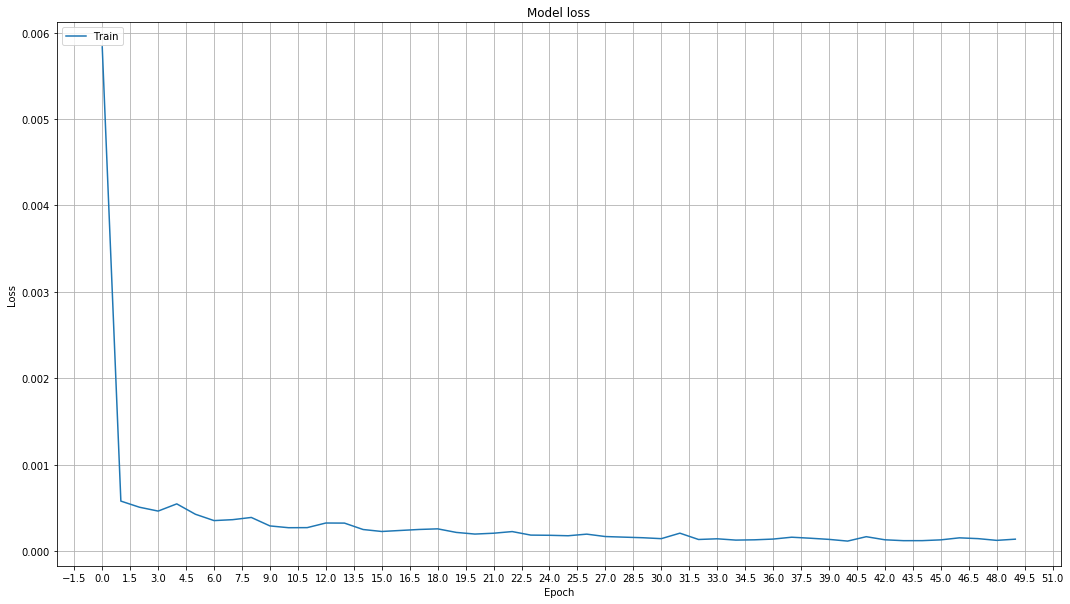

In [87]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(18, 10), sharex=True)
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

# Etapa #6 Avaliar a performance do modelo

In [88]:
x_test.shape

(118, 20, 3)

In [89]:
# Obtendo predições a partir do modelo:
y_pred_scaled = model.predict(x_test)

# Desnormalizar os valores das predições:
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Cálculo das medidas de precisão: 

# Mean Squared Error: (MSE): 
MSE = mean_squared_error(y_test_unscaled, y_pred)
print(f'Test Mean Squared Error (MSE): %.3f' % MSE)

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

# ===== Antes dos dados de Covid:
#   Median Absolute Error (MAE): 0.38
#   Mean Absolute Percentage Error (MAPE): 4.07 %
#   Median Absolute Percentage Error (MDAPE): 3.39 %

# ===== Sem Dif:
# 1rst run: Median Absolute Error (MAE): 0.22
#           Mean Absolute Percentage Error (MAPE): 2.59 %
#           Median Absolute Percentage Error (MDAPE): 1.89 %

# 2nd run:  Median Absolute Error (MAE): 0.3
#           Mean Absolute Percentage Error (MAPE): 3.23 %
#           Median Absolute Percentage Error (MDAPE): 2.34 %

# ===== Com Diff: 
# Median Absolute Error (MAE): 0.15
# Mean Absolute Percentage Error (MAPE): 1.79 %
# Median Absolute Percentage Error (MDAPE): 1.25 %

# ====== Só preços de fechamento e nro de casos e óbitos por covid:
# Median Absolute Error (MAE): 0.34
# Mean Absolute Percentage Error (MAPE): 2.54 %
# Median Absolute Percentage Error (MDAPE): 2.05 %

Test Mean Squared Error (MSE): 0.218
Median Absolute Error (MAE): 0.36
Mean Absolute Percentage Error (MAPE): 2.73 %
Median Absolute Percentage Error (MDAPE): 2.21 %


In [90]:
data_filtered_sub['numCasosCov'].iloc[1700:1720]

1700    21428
1701    10917
1702    25012
1703    48331
1704    33207
1705    29070
1706    13371
1707    35294
1708    34091
1709    35918
1710    16207
1711    31100
1712    47898
1713    37614
1714    34130
1715    21138
1716    50909
1717    49863
1718    50434
1719    46884
Name: numCasosCov, dtype: int64

C:\Users\marli.a.guarino\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\marli.a.guarino\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


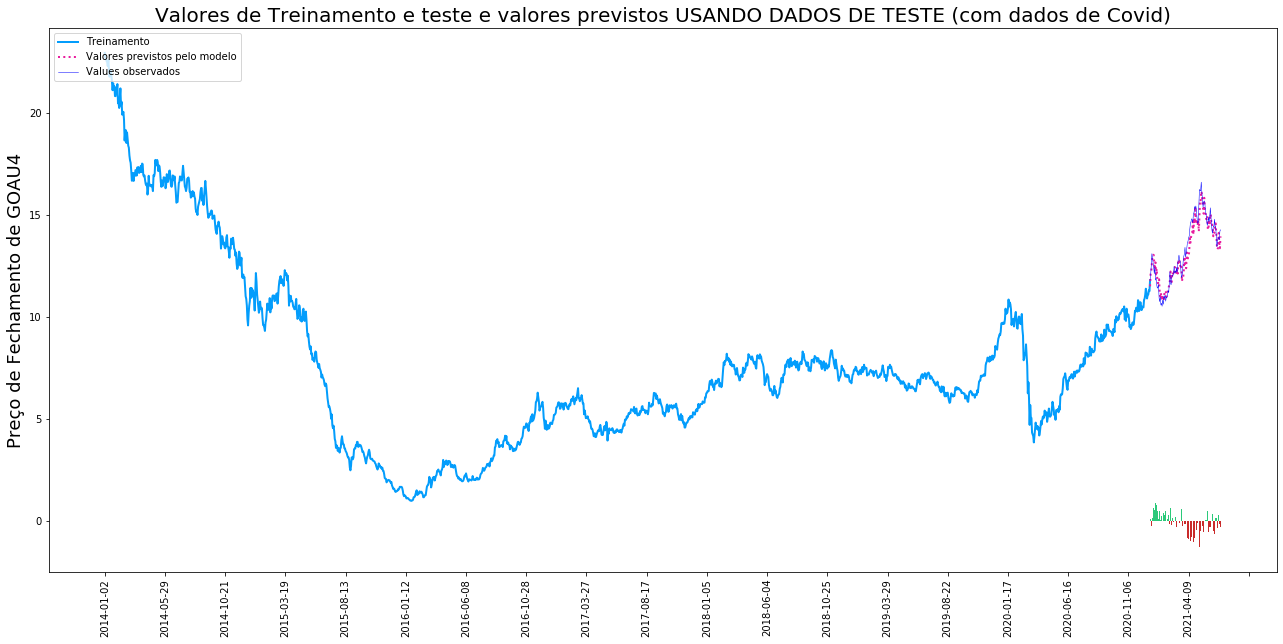

In [91]:
# The date from which on the date is displayed
display_start_date = train_start_date    

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediction", y_pred.ravel(), True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

# Zoom in to a closer timeframe
#valid = valid[valid['Date'] > display_start_date.strftime('%Y-%m-%d')]
#train = train[train['Date'] > display_start_date.strftime('%Y-%m-%d')]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Close"]]
xv = valid['Date']; yv = valid[["Close", "Prediction"]]

x_scale = valid['Date']
x_scale = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500]
plt.xticks(x_scale, rotation='vertical')        # x_scale[::20],  rotation='vertical'
#plt.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
#plt.xaxis.set_major_formatter(DateFormatter("%Y-%m"))

plt.title("Valores de Treinamento e teste e valores previstos USANDO DADOS DE TESTE (com dados de Covid)", fontsize=20)
plt.ylabel('Preço de Fechamento de GOAU4', fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0, linestyle=':')
plt.plot(xv, yv["Close"], color="blue", linewidth=0.5)
plt.legend(["Treinamento", "Valores previstos pelo modelo", "Values observados"], loc="upper left")

# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
#plt.grid()
plt.show()

C:\Users\marli.a.guarino\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\marli.a.guarino\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


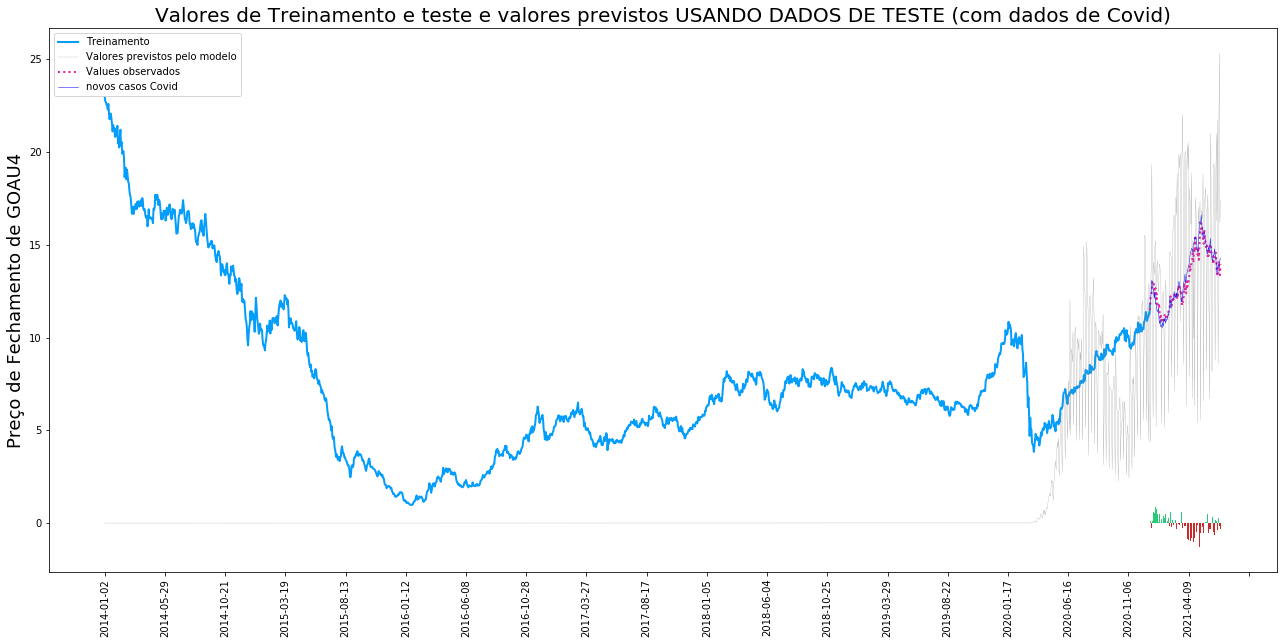

In [92]:
# The date from which on the date is displayed
display_start_date = train_start_date    

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediction", y_pred.ravel(), True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

# Zoom in to a closer timeframe
#valid = valid[valid['Date'] > display_start_date.strftime('%Y-%m-%d')]
#train = train[train['Date'] > display_start_date.strftime('%Y-%m-%d')]

maxGoau = max(train['Close'])
maxCov = max(train['numCasosCov'])

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Close", "numCasosCov"]]
xv = valid['Date']; yv = valid[["Close", "Prediction", "numCasosCov"]]

x_scale = valid['Date']
x_scale = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500]
plt.xticks(x_scale, rotation='vertical')        # x_scale[::20],  rotation='vertical'
#plt.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
#plt.xaxis.set_major_formatter(DateFormatter("%Y-%m"))

plt.title("Valores de Treinamento e teste e valores previstos USANDO DADOS DE TESTE (com dados de Covid)", fontsize=20)
plt.ylabel('Preço de Fechamento de GOAU4', fontsize=18)
plt.plot(xt, yt["Close"], color="#039dfc", linewidth=2.0)
plt.plot(xt, yt["numCasosCov"]*22/100000, color="grey", linewidth=0.2)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0, linestyle=':')
plt.plot(xv, yv["Close"], color="blue", linewidth=0.5)
plt.plot(xv, yv["numCasosCov"]*22/100000, color="grey", linewidth=0.2)
plt.legend(["Treinamento", "Valores previstos pelo modelo", "Values observados","novos casos Covid"], loc="upper left")

# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
#plt.grid()
plt.show()

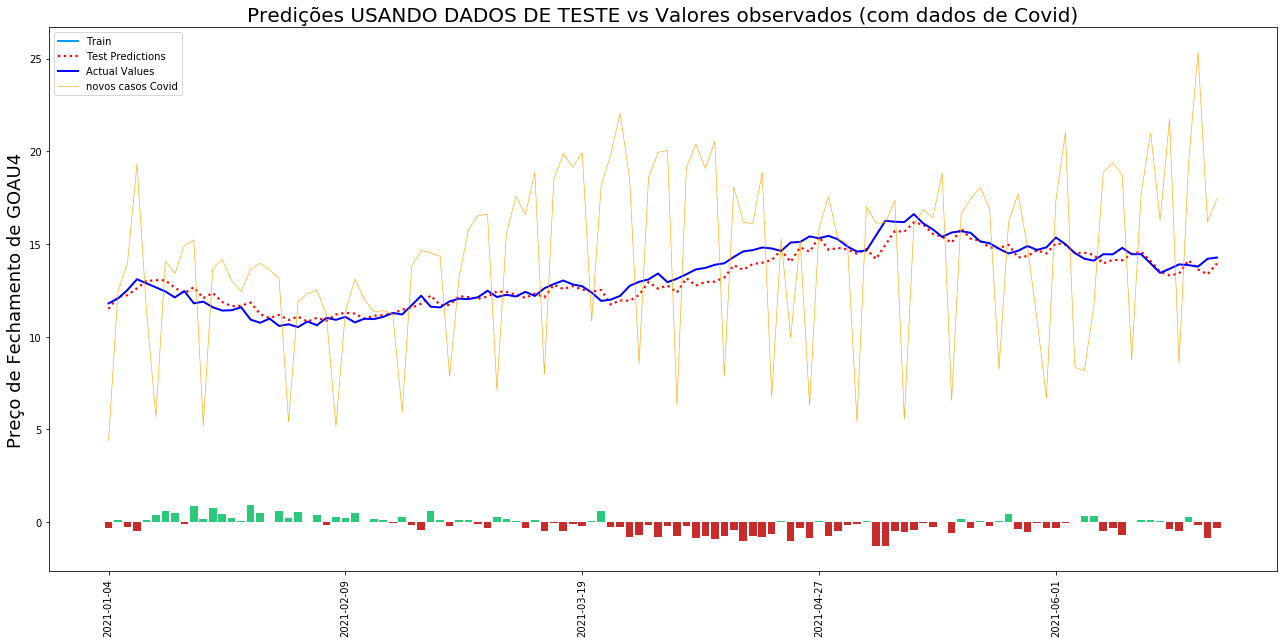

In [93]:
# The date from which on the date is displayed
display_start_date = test_start_date    # pd.Timestamp('today') - timedelta(days=500)

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediction", y_pred.ravel(), True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

# Zoom in to a closer timeframe
#valid = valid[valid['Date'] > display_start_date.strftime('%Y-%m-%d')]
#train = train[train['Date'] > display_start_date.strftime('%Y-%m-%d')]
valid = valid[valid['Date'] > test_start_date]
train = train[train['Date'] > test_start_date]


# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Close"]]
xv = valid['Date']; yv = valid[["Close", "Prediction", "numCasosCov"]]

x_scale = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
plt.xticks(x_scale, rotation='vertical')        # x_scale[::20],  rotation='vertical'

plt.title("Predições USANDO DADOS DE TESTE vs Valores observados (com dados de Covid)", fontsize=20)
plt.ylabel('Preço de Fechamento de GOAU4', fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="red", linewidth=2.2, linestyle=':')
plt.plot(xv, yv["Close"], color="blue", linewidth=2.0)
plt.plot(xv, yv["numCasosCov"]*22/100000, color="orange", linewidth=0.6)
plt.legend(["Train", "Test Predictions", "Actual Values","novos casos Covid"], loc="upper left")

# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
#plt.grid()
plt.show()

# Etapa #7 Avaliar a performance do modelo, sem usar dados de teste nas predições

In [94]:
# começo pegando os últimos valores dos dados de treinamento, para gerar a primeira predição a ser comparada com o primeiro valor de teste
history = train_goau4[-timesteps:]
new_df = history[-timesteps:].filter(FEATURES)

N = timesteps
predictions = []

for d in range(0, len(test_goau4)):
    # Get the last N day closing price values and scale the data to be values between 0 and 1
    last_N_days = new_df[-timesteps:].values
    last_N_days_scaled = scaler.transform(last_N_days)

    # Create an empty list and Append past N days
    X_test_new = []
    X_test_new.append(last_N_days_scaled)

    # Convert the X_test data set to a numpy array and reshape the data
    predict_scaled = model.predict(np.array(X_test_new))
    predict_unscaled = scaler_pred.inverse_transform(predict_scaled.reshape(-1, 1))

    # Print last price and predicted price for the next day
    predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)

    plus = '+'; minus = ''
    #print(f'GOAU4 em {test_goau4.index[d]}: Previsto={predicted_price}  Real=', test_goau4['Close'].iloc[d])
    
    history = history.append(test_goau4.iloc[d])
    new_df = history[-timesteps:].filter(FEATURES)
    
    new_df['Close'].iloc[-1] = predict_unscaled           #  Uso o valor da última predição, ao invés do valor de teste observado!
    predictions.append(predict_unscaled)                   #  Salvo, para por no gráfico, depois

    
    
# o último dia do período de teste não está sendo avaliado, mas isso é irrelevante, no contexto do estudo    


In [95]:
# Por alguma razão, Predictions termina com 3 dimensões, e dá erro, no cálculo de MAE
pred2=[]
for i in range(0, len(predictions)):
    pred2.append(predictions[i][0])
    

y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Cálculo das medidas de precisão: 

# Mean Absolute Error (MAE)
MSE = mean_squared_error(y_test_unscaled, pred2)
print(f'Test Mean Squared Error (MSE): %.3f' % MSE)

# Cálculo das medidas de precisão: Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, pred2)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, predictions)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, predictions)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')



Test Mean Squared Error (MSE): 6.320
Mean Absolute Error (MAE): 2.14
Mean Absolute Percentage Error (MAPE): 12.51 %
Median Absolute Percentage Error (MDAPE): 11.81 %


C:\Users\marli.a.guarino\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\marli.a.guarino\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


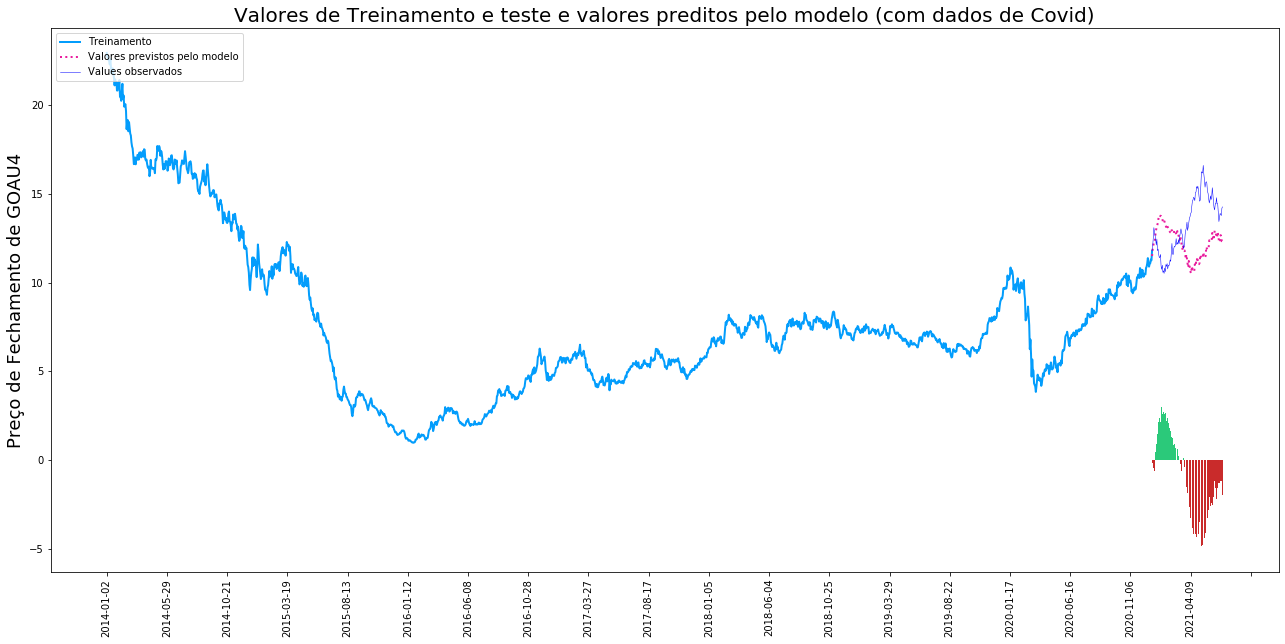

In [96]:
pred3=[]
for i in range(0, len(predictions)):
    pred3.append(pred2[i][0])
    
# The date from which on the date is displayed
display_start_date = train_start_date    

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediction", pred3, True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

# Zoom in to a closer timeframe
#valid = valid[valid['Date'] > display_start_date.strftime('%Y-%m-%d')]
#train = train[train['Date'] > display_start_date.strftime('%Y-%m-%d')]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Close"]]
xv = valid['Date']; yv = valid[["Close", "Prediction"]]

x_scale = valid['Date']
x_scale = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500]
plt.xticks(x_scale, rotation='vertical')        # x_scale[::20],  rotation='vertical'
#plt.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
#plt.xaxis.set_major_formatter(DateFormatter("%Y-%m"))

plt.title("Valores de Treinamento e teste e valores preditos pelo modelo (com dados de Covid)", fontsize=20)
plt.ylabel('Preço de Fechamento de GOAU4', fontsize=18)
plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0, linestyle=':')
plt.plot(xv, yv["Close"], color="blue", linewidth=0.5)
plt.legend(["Treinamento", "Valores previstos pelo modelo", "Values observados"], loc="upper left")

# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
#plt.grid()
plt.show()

C:\Users\marli.a.guarino\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\marli.a.guarino\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


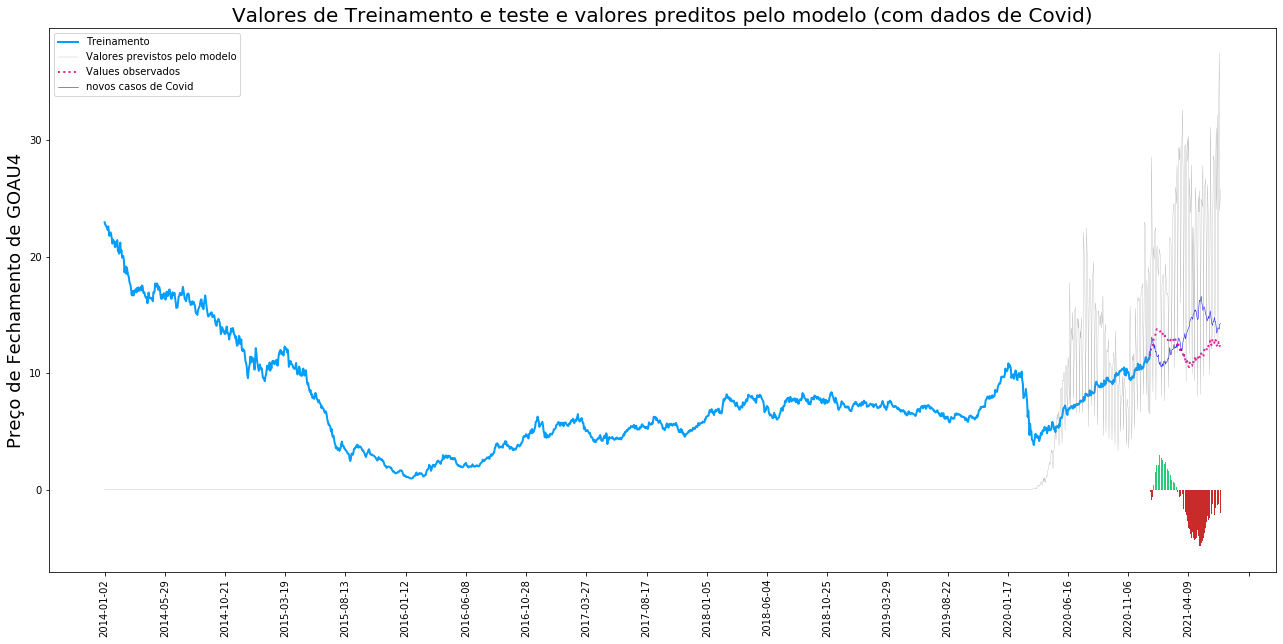

In [100]:
pred3=[]
for i in range(0, len(predictions)):
    pred3.append(pred2[i][0])
    
# The date from which on the date is displayed
display_start_date = train_start_date    

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediction", pred3, True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

# Zoom in to a closer timeframe
#valid = valid[valid['Date'] > display_start_date.strftime('%Y-%m-%d')]
#train = train[train['Date'] > display_start_date.strftime('%Y-%m-%d')]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Close", "numCasosCov"]]
xv = valid['Date']; yv = valid[["Close", "Prediction", "numCasosCov"]]

x_scale = valid['Date']
x_scale = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500]
plt.xticks(x_scale, rotation='vertical')        # x_scale[::20],  rotation='vertical'

maxGoau = max(train_goau4['Close'])
maxCov = max(train_goau4['numCasosCov'])
 
plt.title("Valores de Treinamento e teste e valores preditos pelo modelo (com dados de Covid)", fontsize=20)
plt.ylabel('Preço de Fechamento de GOAU4', fontsize=18)
plt.plot(xt, yt["Close"], color="#039dfc", linewidth=2.0)
plt.plot(xt, yt["numCasosCov"]*maxGoau/maxCov, color="grey", linewidth=0.2)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0, linestyle=':')
plt.plot(xv, yv["Close"], color="blue", linewidth=0.5)
plt.plot(xv, yv["numCasosCov"]*maxGoau/maxCov, color="grey", linewidth=0.2)
plt.legend(["Treinamento", "Valores previstos pelo modelo", "Values observados","novos casos de Covid"], loc="upper left")

# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
#plt.grid()
plt.show()

C:\Users\marli.a.guarino\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\marli.a.guarino\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


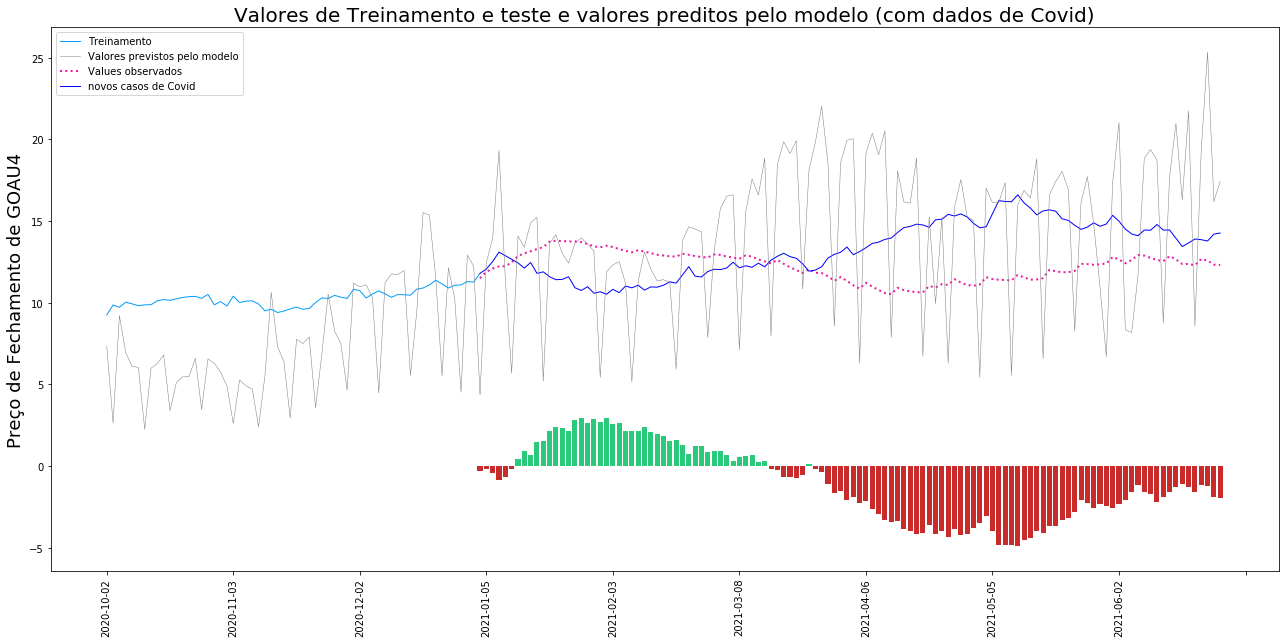

In [98]:
# The date from which on the date is displayed
display_start_date = '2020-10-01'    

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediction", pred3, True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

# Zoom in to a closer timeframe
#valid = valid[valid['Date'] > display_start_date.strftime('%Y-%m-%d')]
train = train[train['Date'] > display_start_date]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Close", "numCasosCov"]]
xv = valid['Date']; yv = valid[["Close", "Prediction", "numCasosCov"]]

x_scale = valid['Date']
x_scale = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600]
plt.xticks(x_scale, rotation='vertical')        # x_scale[::20],  rotation='vertical'
#plt.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
#plt.xaxis.set_major_formatter(DateFormatter("%Y-%m"))

plt.title("Valores de Treinamento e teste e valores preditos pelo modelo (com dados de Covid)", fontsize=20)
plt.ylabel('Preço de Fechamento de GOAU4', fontsize=18)
plt.plot(xt, yt["Close"], color="#039dfc", linewidth=1.0)
plt.plot(xt, yt["numCasosCov"]*22/100000, color="grey", linewidth=0.5)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0, linestyle=':')
plt.plot(xv, yv["Close"], color="blue", linewidth=1.0)
plt.plot(xv, yv["numCasosCov"]*22/100000, color="grey", linewidth=0.5)
plt.legend(["Treinamento", "Valores previstos pelo modelo", "Values observados","novos casos de Covid"], loc="upper left")

# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
#plt.grid()
plt.show()

C:\Users\marli.a.guarino\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\marli.a.guarino\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


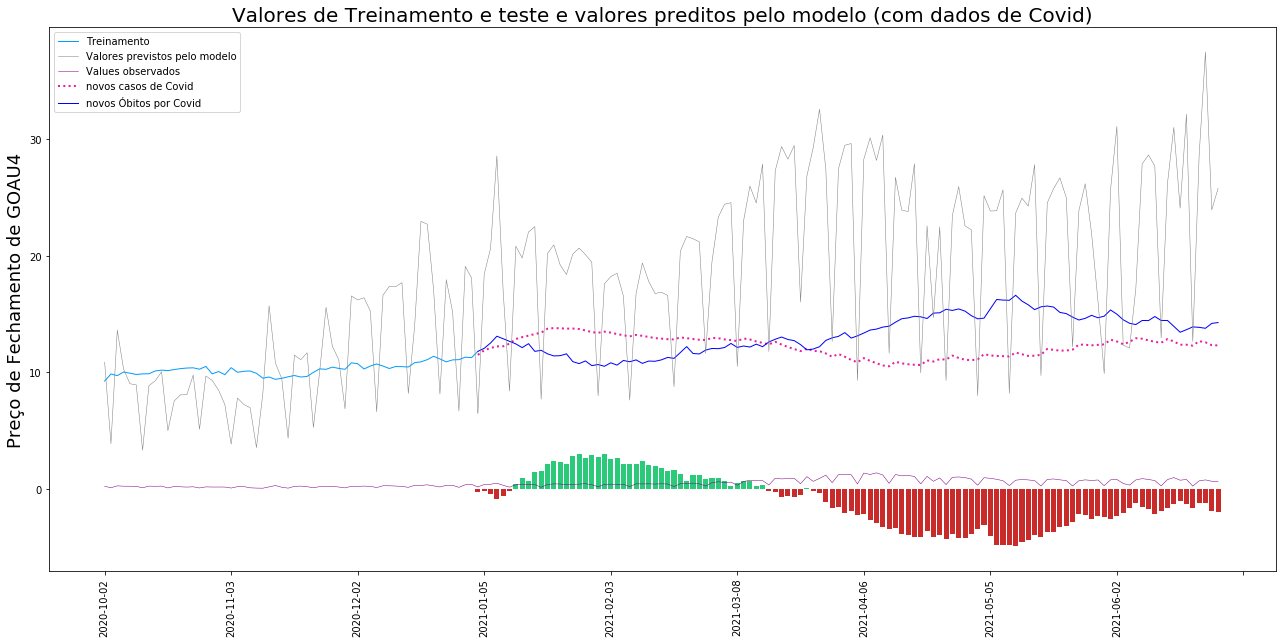

In [104]:
# The date from which on the date is displayed
display_start_date = '2020-10-01'    

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
valid.insert(1, "Prediction", pred3, True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

# Zoom in to a closer timeframe
#valid = valid[valid['Date'] > display_start_date.strftime('%Y-%m-%d')]
train = train[train['Date'] > display_start_date]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Close", "numCasosCov", "numObitosCov"]]
xv = valid['Date']; yv = valid[["Close", "Prediction", "numCasosCov", "numObitosCov"]]

x_scale = valid['Date']
x_scale = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600]
plt.xticks(x_scale, rotation='vertical')        # x_scale[::20],  rotation='vertical'

maxGoau = max(train_goau4['Close'])
maxCov = max(train_goau4['numCasosCov'])
maxObt = max(train_goau4['numObitosCov'])
 
plt.title("Valores de Treinamento e teste e valores preditos pelo modelo (com dados de Covid)", fontsize=20)
plt.ylabel('Preço de Fechamento de GOAU4', fontsize=18)
plt.plot(xt, yt["Close"], color="#039dfc", linewidth=1.0)
plt.plot(xt, yt["numCasosCov"]*maxGoau/maxCov, color="grey", linewidth=0.5)
plt.plot(xt, yt["numObitosCov"]*maxGoau/maxCov, color="purple", linewidth=0.5)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0, linestyle=':')
plt.plot(xv, yv["Close"], color="blue", linewidth=1.0)
plt.plot(xv, yv["numCasosCov"]*maxGoau/maxCov, color="grey", linewidth=0.5)
plt.plot(xv, yv["numObitosCov"]*maxGoau/maxCov, color="purple", linewidth=0.5)
plt.legend(["Treinamento", "Valores previstos pelo modelo", "Values observados","novos casos de Covid"], loc="upper left")

# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
#plt.grid()
plt.show()

In [552]:
test_start_date
train_data_len

1736

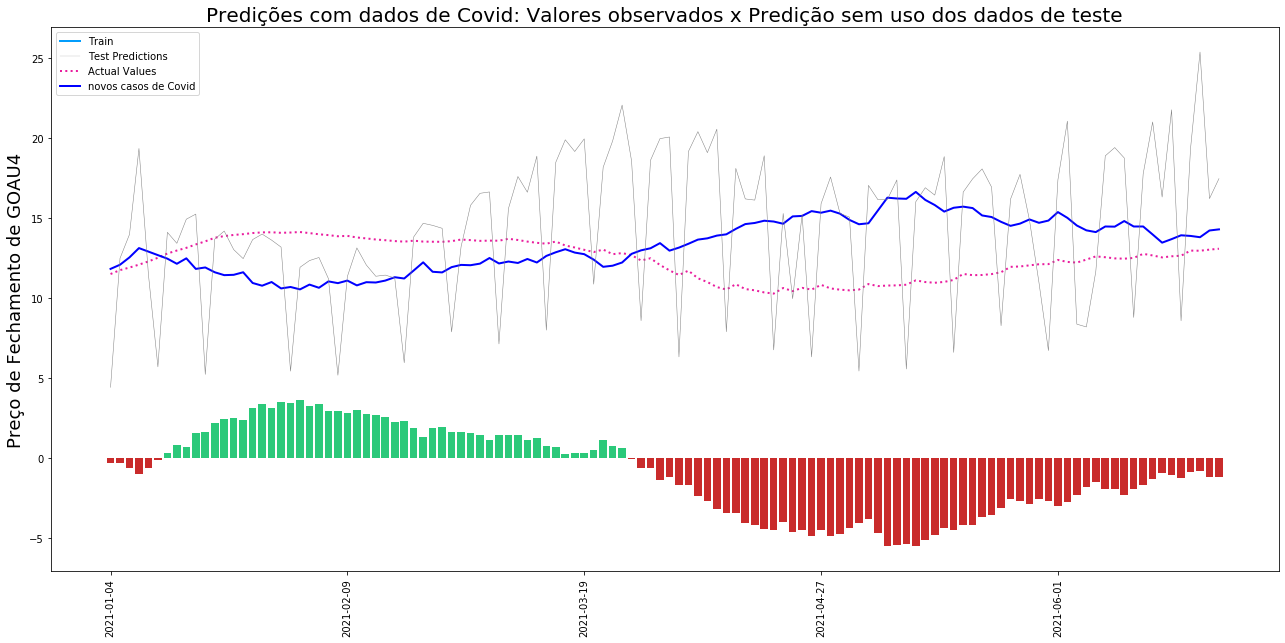

In [549]:
# The date from which on the date is displayed
display_start_date = test_start_date

# Add the date column
data_filtered_sub = data_filtered.copy()
data_filtered_sub['Date'] = date_index

# Add the difference between the valid and predicted prices
train = data_filtered_sub[:train_data_len + 1]
valid = data_filtered_sub[train_data_len:]
#valid.insert(1, "Prediction", y_pred.ravel(), True)
valid.insert(1, "Prediction", pred3, True)
valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)

# Zoom in to a closer timeframe
valid = valid[valid['Date'] > test_start_date]
train = train[train['Date'] > test_start_date]

# Visualize the data
fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
xt = train['Date']; yt = train[["Close", "numCasosCov"]]
xv = valid['Date']; yv = valid[["Close", "Prediction", "numCasosCov"]]

x_scale = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
plt.xticks(x_scale, rotation='vertical')        # x_scale[::20],  rotation='vertical'

plt.title("Predições com dados de Covid: Valores observados x Predição sem uso dos dados de teste", fontsize=20)
plt.ylabel('Preço de Fechamento de GOAU4', fontsize=18)
plt.plot(xt, yt["Close"], color="#039dfc", linewidth=2.0)
plt.plot(xt, yt["numCasosCov"]*22/100000, color="grey", linewidth=0.2)
plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0, linestyle=':')
plt.plot(xv, yv["Close"], color="blue", linewidth=2.0)
plt.plot(xv, yv["numCasosCov"]*22/100000, color="grey", linewidth=0.5)
plt.legend(["Train", "Test Predictions", "Actual Values","novos casos de Covid"], loc="upper left")

# # Create the bar plot with the differences
x = valid['Date']
y = valid["Difference"]

# Create custom color range for positive and negative differences
valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
valid.loc[y < 0, 'diff_color'] = "#C92B2B"

plt.bar(x, y, width=0.8, color=valid['diff_color'])
#plt.grid()
plt.show()